# E-mail Machine-Learning Model

# 1. Importing the required libraries and functions

In [178]:
#importing the function to avoid unnecessary alerts
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)
#importing all the required libraries for all functions
import numpy as num
import pandas as pan
import sys
import sklearn as skl
import matplotlib.pyplot as pt
import seaborn as sb
import string as s

# 2. Acquiring the E-mail dataset

In [179]:
#loading our Email spam information set 
E=pan.read_csv('e-maildata.csv', encoding='ISO-8859-1')
E.columns = ['E-mail', 'Category']
E.head()

E-mail  Category
0  Subject: naturally irresistible your corporate...         1
1  Subject: the stock trading gunslinger  fanny i...         1
2  Subject: unbelievable new homes made easy  im ...         1
3  Subject: 4 color printing special  request add...         1
4  Subject: do not have money , get software cds ...         1

In [180]:
#Mapping the 0s=Ham and 1s=Spam and creating a new column for clarity
E['Class'] = E['Category'].map( {1: 'spam', 0:'ham'} ).astype(str)
#Deleting the old column
E.drop(['Category'], axis=1, inplace=True)

In [181]:
#showing some information about the data
print("\n---------------------The Header part of the data------------------------------------\n")
E.head()


---------------------The Header part of the data------------------------------------



E-mail Class
0  Subject: naturally irresistible your corporate...  spam
1  Subject: the stock trading gunslinger  fanny i...  spam
2  Subject: unbelievable new homes made easy  im ...  spam
3  Subject: 4 color printing special  request add...  spam
4  Subject: do not have money , get software cds ...  spam

In [182]:
#See how the class has been divided
ClassDis=E['Class']
size=len(E.index)

print("\n-----------------------------------Showing the Class Division setup -----------------------\n")
print("Total Dataset Values: {}".format(size))
print(ClassDis.value_counts())
print(ClassDis.value_counts() / size * 100.0)


-----------------------------------Showing the Class Division setup -----------------------

Total Dataset Values: 5728
ham     4360
spam    1368
Name: Class, dtype: int64
ham     76.117318
spam    23.882682
Name: Class, dtype: float64


# 3. Exploring and analysing the data

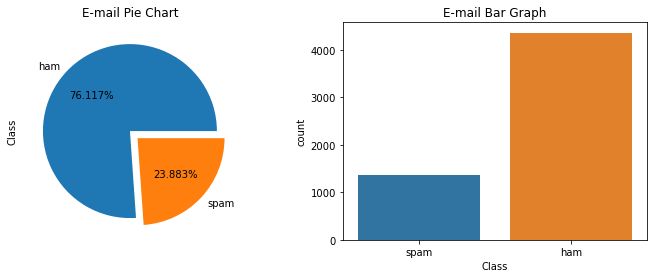

In [183]:
#Class division visualized by bar graph and pie chart
b, XY_Ax=pt.subplots(1,2, figsize=(12,4))
ClassDis.value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=XY_Ax[0]).set_title("E-mail Pie Chart")
sb.countplot('Class',data=E).set_title("E-mail Bar Graph")
pt.show()

In [184]:
# checking out the data given
E.groupby('Class').describe()

E-mail                                                               
       count unique                                                top freq
Class                                                                      
ham     4360   4327  Subject: re : enron visit - - thanks  larry , ...    2
spam    1368   1368  Subject: new offrr  want to know ho liberalize...    1

In [185]:
#Adding a new column to get the length of a message
E['EM_Length'] = E['E-mail'].apply(len)
E.head()

E-mail Class  EM_Length
0  Subject: naturally irresistible your corporate...  spam       1484
1  Subject: the stock trading gunslinger  fanny i...  spam        598
2  Subject: unbelievable new homes made easy  im ...  spam        448
3  Subject: 4 color printing special  request add...  spam        500
4  Subject: do not have money , get software cds ...  spam        235

In [186]:
#Message length described
E.EM_Length.describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: EM_Length, dtype: float64

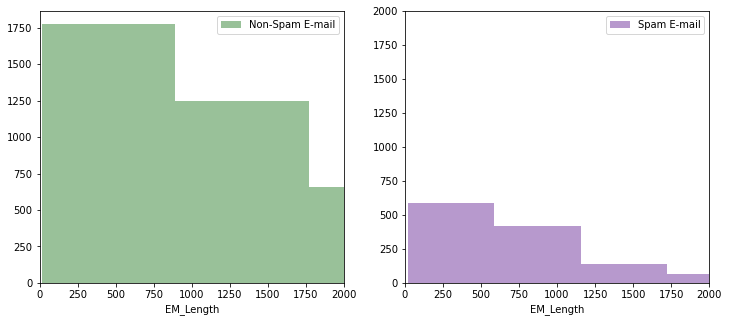

In [187]:
#Message length of spam and non-spam visulaized by bar graph
b, XY_Ax = pt.subplots(1, 2, figsize=(12, 5), sharex=True)
pt.xlim(0,2000)
pt.ylim(0,2000)
sb.distplot(E.EM_Length[E.Class=='ham'], color='darkgreen', label='Non-Spam E-mail', kde=False, ax=XY_Ax[0]);
sb.distplot(E.EM_Length[E.Class=='spam'], color='indigo', label='Spam E-mail', kde=False, ax=XY_Ax[1]);
XY_Ax[0].legend();
XY_Ax[1].legend();

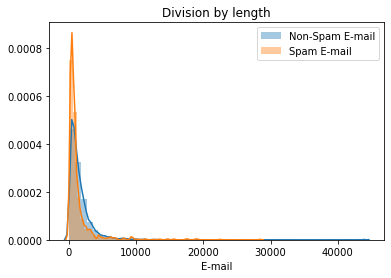

In [188]:
#Spam and non-spam message divided by length visulaized by graph
NormalMsg =E[E['Class'] == 'ham']['E-mail'].str.len()
sb.distplot(NormalMsg, label='Non-Spam E-mail')
SpamMsg = E[E['Class'] == 'spam']['E-mail'].str.len()
sb.distplot(SpamMsg, label='Spam E-mail')
pt.title('Division by length')
pt.legend()
pt.savefig('Length Division.png')

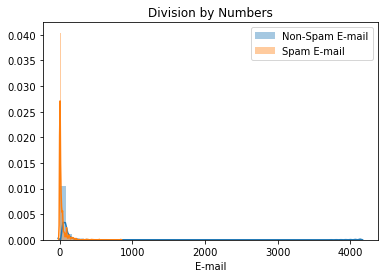

In [189]:
#Spam and non-spam message divided by numbers visulaized by graph
NormalMsg1 = E[E['Class'] == 'ham']['E-mail'].str.replace(r'\D+', '').str.len()
sb.distplot(NormalMsg1, label='Non-Spam E-mail')
SpamMsg1 = E[E['Class'] == 'spam']['E-mail'].str.replace(r'\D+', '').str.len()
sb.distplot(SpamMsg1, label='Spam E-mail')
pt.title('Division by Numbers')
pt.legend()
pt.savefig('text division by nos.png')

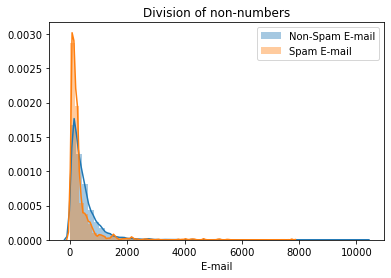

In [190]:
#Spam and non-spam message divided by non-numbers visulaized by graph
NormalMsg2 = E[E['Class'] == 'ham']['E-mail'].str.replace(r'\w+', '').str.len()
sb.distplot(NormalMsg2, label='Non-Spam E-mail')
SpamMsg2 = E[E['Class'] == 'spam']['E-mail'].str.replace(r'\w+', '').str.len()
sb.distplot(SpamMsg2, label='Spam E-mail')
pt.title('Division of non-numbers')
pt.legend()
pt.savefig('text division by non-numbers.png')

# 4. Data Cleaning

In [191]:
#Converting class labels to binary values such as ham=0,Spam=1
from sklearn.preprocessing import LabelEncoder

encode=LabelEncoder()
c = encode.fit_transform(E['Class'])
E["Label"]=c
E.head()

E-mail Class  EM_Length  Label
0  Subject: naturally irresistible your corporate...  spam       1484      1
1  Subject: the stock trading gunslinger  fanny i...  spam        598      1
2  Subject: unbelievable new homes made easy  im ...  spam        448      1
3  Subject: 4 color printing special  request add...  spam        500      1
4  Subject: do not have money , get software cds ...  spam        235      1

In [192]:
#New column "Refined text" created to see changes
E["Refined E-mail"] = E["E-mail"].copy()
E.head()

E-mail Class  EM_Length  Label  \
0  Subject: naturally irresistible your corporate...  spam       1484      1   
1  Subject: the stock trading gunslinger  fanny i...  spam        598      1   
2  Subject: unbelievable new homes made easy  im ...  spam        448      1   
3  Subject: 4 color printing special  request add...  spam        500      1   
4  Subject: do not have money , get software cds ...  spam        235      1   

                                      Refined E-mail  
0  Subject: naturally irresistible your corporate...  
1  Subject: the stock trading gunslinger  fanny i...  
2  Subject: unbelievable new homes made easy  im ...  
3  Subject: 4 color printing special  request add...  
4  Subject: do not have money , get software cds ...

In [193]:
# Getting rid of all unwanted words,tabs..etc and a space is placed in all number places
E['Refined E-mail'] = E['Refined E-mail'].str.replace('Subject:',' ')
E['Refined E-mail'] = E['Refined E-mail'].str.replace('re :',' ')
E["Refined E-mail"] = E["Refined E-mail"].str.replace(r'\d+(\.\d+)?', '')
E["Refined E-mail"] = E["Refined E-mail"].str.replace(r'[^\w\d\s]', ' ')
E["Refined E-mail"] = E["Refined E-mail"].str.replace(r'\s+', ' ')
E["Refined E-mail"] = E["Refined E-mail"].str.replace(r'^\s+|\s+?$', '')

# Substituting URL addresses with 'add'
E['Refined E-mail'] = E['Refined E-mail'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'add')

# Substituting currency symbols with 'currency'
E['Refined E-mail'] = E['Refined E-mail'].str.replace(r'Â£|\$', 'currency')

# Changing all capital words to small word
E["Refined E-mail"] = E["Refined E-mail"].str.lower()

# Getting rid of 1 term words
E["Refined E-mail"] = E["Refined E-mail"].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
E.head()

E-mail Class  EM_Length  Label  \
0  Subject: naturally irresistible your corporate...  spam       1484      1   
1  Subject: the stock trading gunslinger  fanny i...  spam        598      1   
2  Subject: unbelievable new homes made easy  im ...  spam        448      1   
3  Subject: 4 color printing special  request add...  spam        500      1   
4  Subject: do not have money , get software cds ...  spam        235      1   

                                      Refined E-mail  
0  naturally irresistible your corporate identity...  
1  the stock trading gunslinger fanny is merrill ...  
2  unbelievable new homes made easy im wanting to...  
3  color printing special request additional info...  
4  do not have money get software cds from here s...

In [194]:
# Removing punctuation marks like . , ! , ? , : ..etc
s.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# 5. Data Preprocessing

In [195]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer as ss
from nltk.corpus import stopwords
#gives a specific set of words 
Sw= (stopwords.words('english')) 
Sw[0:10] 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [196]:
#Removing terms using the stemming process
processStem = ss("english")
def txtproc(msg):   
    msg = msg.translate(str.maketrans('','', s.punctuation))
    ws = [processStem.stem(word) for word in msg.split() if word.lower() not in stopwords.words("english")]
    return " ".join(ws)
E["Refined E-mail"] = E["Refined E-mail"].apply(txtproc)

In [197]:
#showing the old E-mail and new E-mails transformed
print("Unprocessed 1st E-mail:\t", E['E-mail'][1])
print("\nRefined E-mail :\t\t", E['Refined E-mail'][1], '\n')

print("Unprocessed 4th E-mail:\t", E['E-mail'][4])
print("\nRefined E-mail :\t\t", E['Refined E-mail'][4], '\n')

print("Unprocessed 400th E-mail:\t", E['E-mail'][400])
print("\nRefined E-mail :\t\t", E['Refined E-mail'][400], '\n')

print("Unprocessed 14th E-mail:\t", E['E-mail'][14])
print("\nRefined E-mail :\t\t", E['Refined E-mail'][14], '\n')

print("Unprocessed 5530th E-mail:\t", E['E-mail'][5530])
print("\nRefined E-mail :\t\t", E['Refined E-mail'][5530], '\n')

Unprocessed 1st E-mail:	 Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no 

Refined E-mail :		 stock trade gunsling fanni merril muzo colza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania yes chameleon continu clothesman libretto chesapeak tight waterway herald hawthorn like chisel morristown superior deoxyribonucl clockwork tri hall incred mcdougal yes hepburn einsteinian earmark sapl boar duan plain palfrey inf

In [198]:
#token are created with E-mails refined
from nltk import word_tokenize,sent_tokenize
E['Toklist'] = E['Refined E-mail'].map(lambda w: nltk.tokenize.word_tokenize(w))

In [199]:
# new column "Refined Msg_length" is created to show the changes
E['Refined EM_Length'] = E['Refined E-mail'].apply(len)
E.head()

E-mail Class  EM_Length  Label  \
0  Subject: naturally irresistible your corporate...  spam       1484      1   
1  Subject: the stock trading gunslinger  fanny i...  spam        598      1   
2  Subject: unbelievable new homes made easy  im ...  spam        448      1   
3  Subject: 4 color printing special  request add...  spam        500      1   
4  Subject: do not have money , get software cds ...  spam        235      1   

                                      Refined E-mail  \
0  natur irresist corpor ident lt realli hard rec...   
1  stock trade gunsling fanni merril muzo colza a...   
2  unbeliev new home made easi im want show homeo...   
3  color print special request addit inform click...   
4  money get softwar cds softwar compat great gro...   

                                             Toklist  Refined EM_Length  
0  [natur, irresist, corpor, ident, lt, realli, h...                760  
1  [stock, trade, gunsling, fanni, merril, muzo, ...                455  
2  [unbeliev, new, home, made, easi, im, want, sh...                231  
3  [color, print, special, request, addit, inform...                281  
4  [money, get, softwar, cds, softwar, compat, gr...                107

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


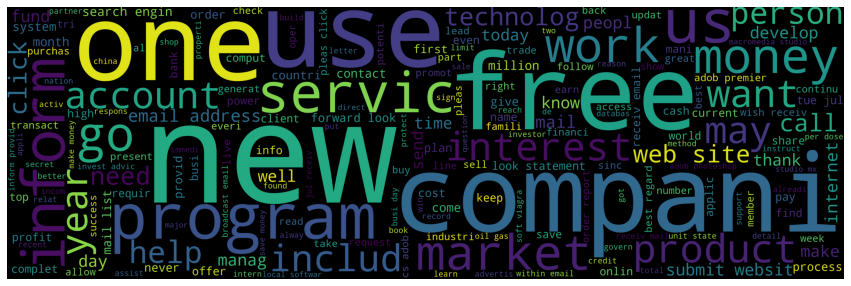

In [200]:
#Using Wordcloud to visualise Spam words
from wordcloud import WordCloud as wc
spammail = ' '.join(list(E[E['Class'] == "spam"]["Refined E-mail"]))
spamset = wc(height = 1300, width=4000).generate(spammail)
pt.figure(figsize=(15,15))
pt.imshow(spamset)
pt.axis('off')
pt.show()

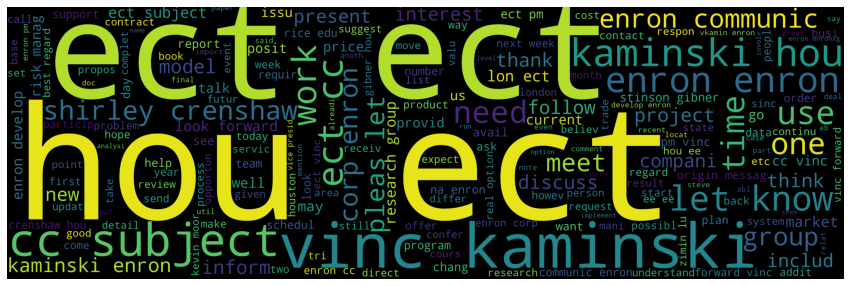

In [201]:
#Using Wordcloud to visualise Non-spam words
from wordcloud import WordCloud as wc
NonSpammail = ' '.join(list(E[E['Class'] == "ham"]["Refined E-mail"]))
NonSpamset = wc(height = 1300, width=4000).generate(NonSpammail)
pt.figure(figsize=(15,15))
pt.imshow(NonSpamset)
pt.axis('off')
pt.show()

In [202]:
#getting most used 20 terms in spam and non-spam messages
from collections import Counter
NonSpamset = Counter(" ".join(E[E['Class']=='ham']["Refined E-mail"]).split()).most_common(20)
NonSpamsetdata = pan.DataFrame.from_dict(NonSpamset)
NonSpamsetdata= NonSpamsetdata.rename(columns={0: "Non-spam text", 1 : "count"})

spamset = Counter(" ".join(E[E['Class']=='spam']["Refined E-mail"]).split()).most_common(20)
Spamsetdata = pan.DataFrame.from_dict(spamset)
Spamsetdata = Spamsetdata.rename(columns={0: "Spam text", 1 : "count_"})


In [203]:
print(NonSpamsetdata[0:20])
print('\n\n',Spamsetdata[0:20])

   Non-spam text  count
0          enron  13388
1            ect  11417
2           vinc   8531
3            hou   5569
4       kaminski   4801
5          pleas   4494
6            com   4444
7        subject   4265
8          would   4151
9             cc   3889
10         thank   3558
11            pm   3262
12       forward   2952
13      research   2752
14          time   2552
15          meet   2544
16         group   2474
17          know   2345
18         manag   2334
19          work   2293


    Spam text  count_
0    compani    1065
1        com    1000
2       mail     917
3       busi     897
4      email     865
5     inform     818
6     receiv     727
7        get     694
8      money     662
9      pleas     619
10      free     606
11      make     603
12    market     600
13      http     600
14      time     593
15       one     592
16     click     552
17       use     546
18     order     541
19    invest     540


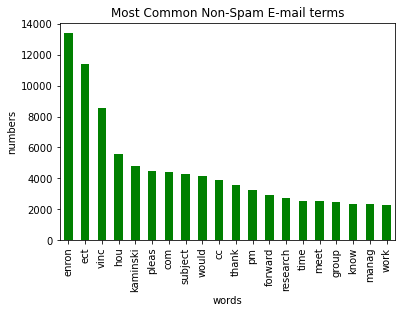

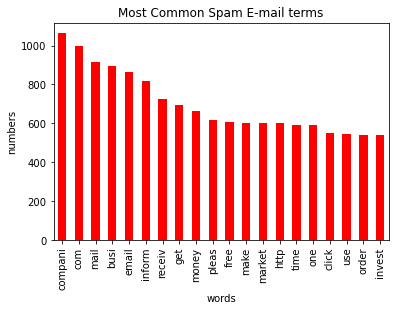

In [204]:
NonSpamsetdata.plot.bar(legend = False, color = 'green')
Yaxis = num.arange(len(NonSpamsetdata["Non-spam text"]))
pt.xticks(Yaxis, NonSpamsetdata["Non-spam text"])
pt.title('Most Common Non-Spam E-mail terms')
pt.xlabel('words')
pt.ylabel('numbers')
pt.show()

Spamsetdata.plot.bar(legend = False, color = 'red')
Yaxis = num.arange(len(Spamsetdata["Spam text"]))
pt.xticks(Yaxis,Spamsetdata["Spam text"])
pt.title('Most Common Spam E-mail terms')
pt.xlabel('words')
pt.ylabel('numbers')
pt.show()

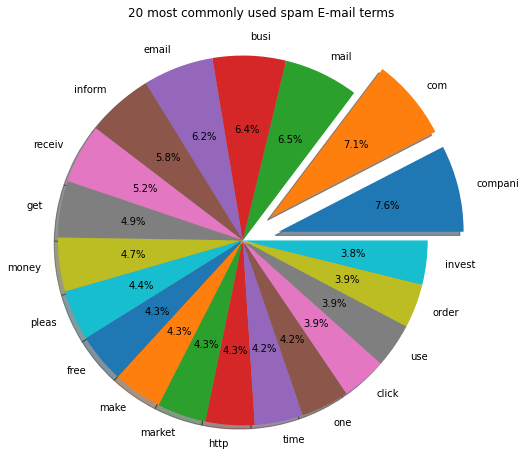

In [205]:
#showing the percentage of each word used
explode = (0.2, 0.2, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) 
f, Axis = pt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
pt.pie(Spamsetdata['count_'],
       labels = Spamsetdata["Spam text"], 
       shadow = True,
       autopct='%1.1f%%', 
       explode = explode)
pt.title("20 most commonly used spam E-mail terms")
pt.axis('equal')
pt.show()

In [206]:
pip install mlxtend

In [207]:
# A copy of the dataset is created 
Wholedataset = E.copy()
# getting rid of unwanted columns
Wholedataset.drop(["Refined E-mail", "EM_Length", "Toklist", "Refined EM_Length", "Class"], axis = 1, inplace = True)  
print(Wholedataset.count())

E-mail    5728
Label     5728
dtype: int64


# 6.Splitting the dataset into training and testing data 

In [208]:
from sklearn import feature_extraction, model_selection, naive_bayes, svm
from sklearn import metrics as m
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as CT
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report as ClassRep
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import learning_curve
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

TrainA, TestA, TrainB, TestB = train_test_split(Wholedataset['E-mail'],
                                                    Wholedataset['Label'],
                                                    test_size=0.3,
                                                    random_state=101)

## 6a. Balancing the Dataset

In [209]:
# Joining TrainA and TrainB column to create a whole dataset consisting of Content and label columns
TrainANewset=pan.concat([TrainA, TrainB], axis=1)

NonSpam=TrainANewset[TrainANewset['Label']==0] 

Spam=TrainANewset[TrainANewset['Label']==1] 

#Upgrading the dataset
SpamUpgrade = resample(Spam,replace=True,n_samples=3000,random_state=101) 

# joining upgraded spam messages with non-spam messages for a unified distribution
Upgraded = pan.concat([NonSpam, SpamUpgrade])

TrainA=Upgraded['E-mail']
TrainB=Upgraded['Label']

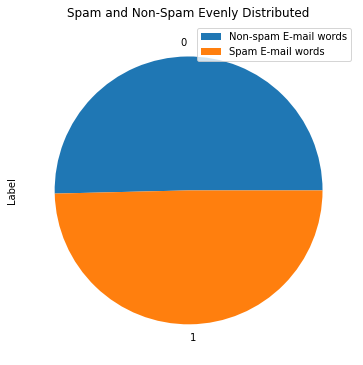

In [210]:
#Visualizing the new balanced dataset

Upgraded["Label"].value_counts().plot(kind = 'pie', 
                                          figsize = (6, 7))
                                          

pt.title('Spam and Non-Spam Evenly Distributed')
pt.legend(["Non-spam E-mail words", "Spam E-mail words"])
pt.show()

## 6b.Vectorization process using TF-IDF Vectorizer

In [211]:
# Train data is transformed using TFIDF 
Tfvecto = TfidfVectorizer(stop_words = 'english', use_idf = True, lowercase = True, strip_accents='ascii')
TrainA_Tfvecto = Tfvecto.fit_transform(TrainA) 
TestA_Tfvecto = Tfvecto.transform(TestA) 
print(TrainA_Tfvecto.shape)

(6046, 31373)


In [212]:
print(TrainA_Tfvecto.shape)
print(TestA_Tfvecto.shape)

(6046, 31373)
(1719, 31373)


In [213]:
TrainA_Tfvecto

<6046x31373 sparse matrix of type '<class 'numpy.float64'>'
	with 525821 stored elements in Compressed Sparse Row format>

In [214]:
t = TrainA_Tfvecto.toarray()
print(TrainA.iloc[3],'\n')
print(TrainA.iloc[300],'\n')
print(TrainA.iloc[3000],'\n')

Subject: confirmation of meeting  vince : thanks for introducing me as a speaker at the power 2000 conference .  as per our conversation , please find enclosed my resume .  i will come to your office at 1 : 30 pm , friday , may 12 , 2000 . please let me  know if the dress code is casual or formal .  thanks again for taking the time to talk to me regarding opportunities at  enron .  >  sanjeev k khanna , m . sc . , p . eng .  director , quantitative risk management  pg & e energy trading  1100 louisina street , # 1000  houston , tx 77094  email : sanjeev . khanna @ et . pge . com  tel : ( 713 ) 371 6647 , pager 800 - 526 - 4095 , cell ( 281 ) 302 - 8468  pg & e energy trading and any other company referenced herein which uses the  pg & e name or logo are not the same company as pacific gas and electric  company , the california utility . these companies are not regulated by the  california public utilities commission , and customers do not have to buy  products from these companies in o

In [215]:
# Tfidf transformation
t = TrainA_Tfvecto.toarray()
print(Tfvecto.inverse_transform(t[3]),'\n')
print(Tfvecto.inverse_transform(t[300]),'\n')
print(Tfvecto.inverse_transform(t[3000]),'\n')

[array(['1000', '1100', '12', '2000', '281', '30', '302', '371', '4095',
       '526', '6647', '713', '77094', '800', '8468', 'buy', 'california',
       'casual', 'cell', 'code', 'com', 'come', 'commission', 'companies',
       'company', 'conference', 'confirmation', 'continue',
       'conversation', 'customers', 'director', 'doc', 'dress',
       'electric', 'email', 'enclosed', 'energy', 'eng', 'enron', 'et',
       'formal', 'friday', 'gas', 'houston', 'introducing', 'khanna',
       'know', 'let', 'logo', 'louisina', 'management', 'meeting',
       'office', 'opportunities', 'order', 'pacific', 'pager', 'pg',
       'pge', 'pm', 'power', 'products', 'public', 'quality',
       'quantitative', 'receive', 'referenced', 'regarding', 'regulated',
       'resume', 'risk', 'sanjeev', 'sc', 'services', 'speaker', 'street',
       'subject', 'taking', 'talk', 'tel', 'thanks', 'time', 'trading',
       'tx', 'uses', 'utilities', 'utility', 'vince'], dtype='<U22')] 

[array(['312', '692',

# 7. Comparison of Various ML Classifiers

## 7.1 Naive Bayes

In [216]:
# Model training and prediction
NBModel = MultinomialNB()
NBModel.fit(TrainA_Tfvecto, TrainB)

MultinomialNB()

In [217]:
NBPred = NBModel.predict(TestA_Tfvecto)
accuracy1=m.accuracy_score(TestB, NBPred)*100
print(accuracy1)

99.01105293775451


In [218]:
print(ClassRep(TestB, NBPred))

pan.DataFrame(
   CT(TestB, NBPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1314
           1       0.98      0.98      0.98       405

    accuracy                           0.99      1719
   macro avg       0.99      0.98      0.99      1719
weighted avg       0.99      0.99      0.99      1719



PredictedData     
                          Ham Spam
ActualData Ham           1307    7
           Spam            10  395

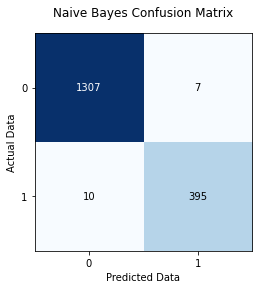

In [219]:
NB_Conmat = CT(TestB, NBPred)

f1, Axis1 = plot_confusion_matrix(conf_mat=NB_Conmat ,figsize=(8, 4))
pt.title("Naive Bayes Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

Naive Bayes Area Under Curve is : 0.984990698461018


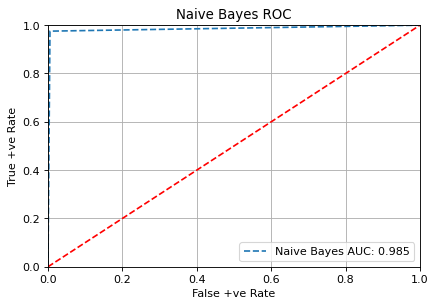

In [220]:
fpr1, tpr1, thresholds1 = m.roc_curve(TestB, NBPred, pos_label=1)
NB_Curve = m.auc(fpr1, tpr1)
fig1=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("Naive Bayes Area Under Curve is : {0}".format(NB_Curve))

pt.title('Naive Bayes ROC')
pt.plot(fpr1, tpr1,linestyle='--', label='Naive Bayes AUC: %0.3f' %NB_Curve)
#pt.plot(fpr, tpr,color='red','b', label = 'AUC = %0.3f' % NB_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('NB ROC')
pt.grid()
pt.show()

## 7.2 Logistic Regression

In [221]:
# Training and predicting spam messages using Logit Regression
LRModel = LogisticRegression()
LRModel.fit(TrainA_Tfvecto, TrainB)

LogisticRegression()

In [222]:
LRPred = LRModel.predict(TestA_Tfvecto)
accuracy2=m.accuracy_score(TestB, LRPred)*100
print(accuracy2)

99.12739965095986


In [223]:
print(ClassRep(TestB, LRPred))

pan.DataFrame(
   CT(TestB, LRPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1314
           1       0.97      1.00      0.98       405

    accuracy                           0.99      1719
   macro avg       0.98      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719



PredictedData     
                          Ham Spam
ActualData Ham           1300   14
           Spam             1  404

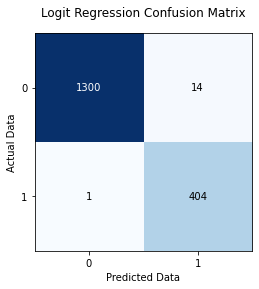

In [224]:
LR_ConMat = CT(TestB, LRPred)
f2,Axis2 = plot_confusion_matrix(conf_mat=LR_ConMat ,  figsize=(8, 4))
pt.title("Logit Regression Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

Logistic Regression Area Under Curve is : 0.993438187045493


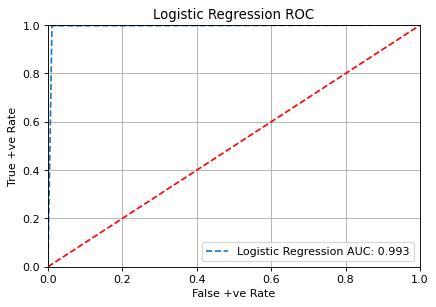

In [225]:
fpr2, tpr2, thresholds2 = m.roc_curve(TestB, LRPred, pos_label=1)
LR_Curve = m.auc(fpr2, tpr2)
fig2=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("Logistic Regression Area Under Curve is : {0}".format(LR_Curve))

pt.title('Logistic Regression ROC')
pt.plot(fpr2, tpr2,linestyle='--', label='Logistic Regression AUC: %0.3f' %LR_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('LR ROC')
pt.grid()
pt.show()

## 7.3 Stochastic Gradient Descent Classifier

In [226]:
SGDModel = SGDClassifier(max_iter = 100)
SGDModel.fit(TrainA_Tfvecto, TrainB)

SGDClassifier(max_iter=100)

In [227]:
SGDPred = SGDModel.predict(TestA_Tfvecto)
accuracy3=m.accuracy_score(TestB, SGDPred)*100
print(accuracy3)

99.65095986038395


In [228]:
print(ClassRep(TestB, SGDPred))

pan.DataFrame(
   CT(TestB, SGDPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1314
           1       1.00      0.99      0.99       405

    accuracy                           1.00      1719
   macro avg       1.00      0.99      1.00      1719
weighted avg       1.00      1.00      1.00      1719



PredictedData     
                          Ham Spam
ActualData Ham           1313    1
           Spam             5  400

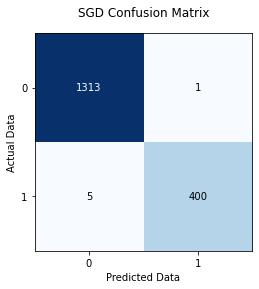

In [229]:
SGD_ConMat = CT(TestB, SGDPred)
f3, Axis3 = plot_confusion_matrix(conf_mat=SGD_ConMat ,  figsize=(8, 4))
pt.title("SGD Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

SGD Classifier Area Under Curve is : 0.9934466429900219


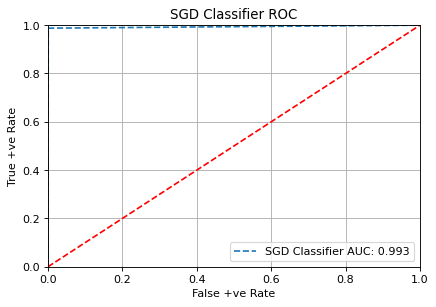

In [230]:
fpr3, tpr3, thresholds3 = m.roc_curve(TestB, SGDPred, pos_label=1)
SGD_Curve = m.auc(fpr3, tpr3)
fig3=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("SGD Classifier Area Under Curve is : {0}".format(SGD_Curve))

pt.title('SGD Classifier ROC')
pt.plot(fpr3, tpr3,linestyle='--', label='SGD Classifier AUC: %0.3f' %SGD_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('SGD ROC')
pt.grid()
pt.show()

## 7.4 KNN Neighbors

In [231]:
KNNModel = KNeighborsClassifier()
KNNModel.fit(TrainA_Tfvecto, TrainB)

KNeighborsClassifier()

In [232]:
KNNPred = KNNModel.predict(TestA_Tfvecto)
accuracy4=m.accuracy_score(TestB, KNNPred)*100
print(accuracy4)

98.5456660849331


In [233]:
print(ClassRep(TestB, KNNPred))

pan.DataFrame(
   CT(TestB, KNNPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1314
           1       0.96      0.98      0.97       405

    accuracy                           0.99      1719
   macro avg       0.98      0.98      0.98      1719
weighted avg       0.99      0.99      0.99      1719



PredictedData     
                          Ham Spam
ActualData Ham           1298   16
           Spam             9  396

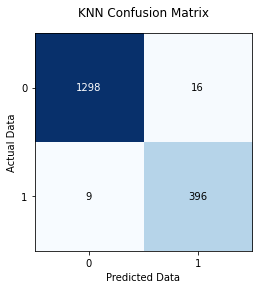

In [234]:
KNN_ConMat = CT(TestB, KNNPred)
f4, Axis4 = plot_confusion_matrix(conf_mat=KNN_ConMat ,  figsize=(8, 4))
pt.title("KNN Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

KNN Classifier Area Under Curve is : 0.9828006088280061


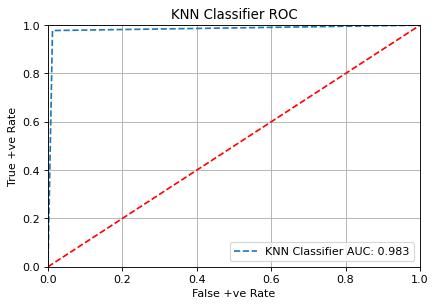

In [235]:
fpr4, tpr4, thresholds4 = m.roc_curve(TestB, KNNPred, pos_label=1)
KNN_Curve = m.auc(fpr4, tpr4)
fig4=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("KNN Classifier Area Under Curve is : {0}".format(KNN_Curve))

pt.title('KNN Classifier ROC')
pt.plot(fpr4, tpr4,linestyle='--', label='KNN Classifier AUC: %0.3f' %KNN_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('KNN ROC')
pt.grid()
pt.show()

## 7.5 Random Decision Forest

In [236]:
RDFModel = RandomForestClassifier()
RDFModel.fit(TrainA_Tfvecto, TrainB)

RandomForestClassifier()

In [237]:
RDFPred = RDFModel.predict(TestA_Tfvecto)
accuracy5=m.accuracy_score(TestB, RDFPred)*100
print(accuracy5)

98.60383944153578


In [238]:
print(ClassRep(TestB, RDFPred))
pan.DataFrame(
   CT(TestB, RDFPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1314
           1       0.97      0.97      0.97       405

    accuracy                           0.99      1719
   macro avg       0.98      0.98      0.98      1719
weighted avg       0.99      0.99      0.99      1719



PredictedData     
                          Ham Spam
ActualData Ham           1302   12
           Spam            12  393

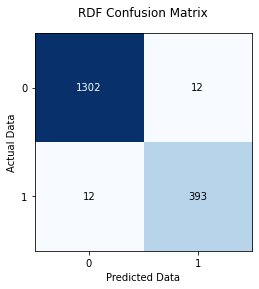

In [239]:
RDF_ConMat = CT(TestB, RDFPred)
f5, Axis5 = plot_confusion_matrix(conf_mat=RDF_ConMat ,  figsize=(8, 4))
pt.title("RDF Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

RDF Classifier Area Under Curve is : 0.980618975139523


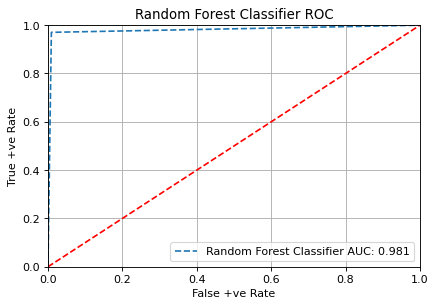

In [240]:
fpr5, tpr5, thresholds5 = m.roc_curve(TestB, RDFPred, pos_label=1)
RDF_Curve = m.auc(fpr5, tpr5)
fig5=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("RDF Classifier Area Under Curve is : {0}".format(RDF_Curve))

pt.title('Random Forest Classifier ROC')
pt.plot(fpr5, tpr5,linestyle='--', label='Random Forest Classifier AUC: %0.3f' %RDF_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('RDF ROC')
pt.grid()
pt.show()

## 7.6 Decision Tree Learning

In [241]:
DTModel = DecisionTreeClassifier()
DTModel.fit(TrainA_Tfvecto, TrainB)

DecisionTreeClassifier()

In [242]:
DTPred = DTModel.predict(TestA_Tfvecto)
accuracy6=m.accuracy_score(TestB, DTPred)*100
print(accuracy6)

95.75334496800465


In [243]:
print(ClassRep(TestB, DTPred))

pan.DataFrame(
   CT(TestB, DTPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1314
           1       0.89      0.93      0.91       405

    accuracy                           0.96      1719
   macro avg       0.94      0.95      0.94      1719
weighted avg       0.96      0.96      0.96      1719



PredictedData     
                          Ham Spam
ActualData Ham           1269   45
           Spam            28  377

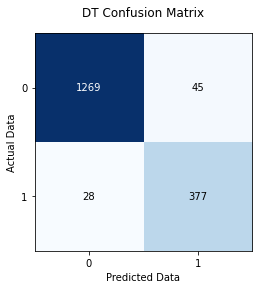

In [244]:
DT_ConMat = CT(TestB, DTPred)
f6, Axis6 = plot_confusion_matrix(conf_mat=DT_ConMat ,  figsize=(8, 4))
pt.title("DT Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

DT Classifier Area Under Curve is : 0.9483088110941993


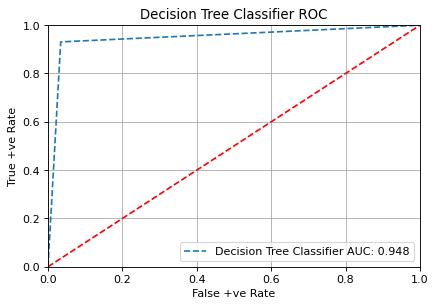

In [245]:
fpr6, tpr6, thresholds6 = m.roc_curve(TestB, DTPred, pos_label=1)
DT_Curve = m.auc(fpr6, tpr6)
fig6=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("DT Classifier Area Under Curve is : {0}".format(DT_Curve))

pt.title('Decision Tree Classifier ROC')
pt.plot(fpr6, tpr6,linestyle='--', label='Decision Tree Classifier AUC: %0.3f' %DT_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('DT ROC')
pt.grid()
pt.show()

## 7.7 Support Vector Machine Linear

In [246]:
SVMModel = SVC(kernel = 'linear')
SVMModel.fit(TrainA_Tfvecto, TrainB)

SVC(kernel='linear')

In [247]:
SVMPred = SVMModel.predict(TestA_Tfvecto)
accuracy7=m.accuracy_score(TestB, SVMPred)*100
print(accuracy7)

99.59278650378127


In [248]:
print(ClassRep(TestB, SVMPred))

pan.DataFrame(
   CT(TestB, SVMPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1314
           1       1.00      0.99      0.99       405

    accuracy                           1.00      1719
   macro avg       1.00      0.99      0.99      1719
weighted avg       1.00      1.00      1.00      1719



PredictedData     
                          Ham Spam
ActualData Ham           1313    1
           Spam             6  399

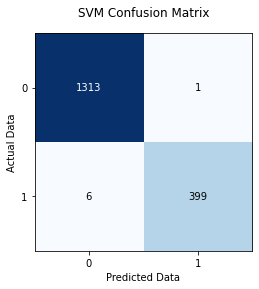

In [249]:
SVM_ConMat = CT(TestB, SVMPred)
f7, Axis7 = plot_confusion_matrix(conf_mat=SVM_ConMat ,  figsize=(8, 4))
pt.title("SVM Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

SVM Classifier Area Under Curve is : 0.9922120750887874


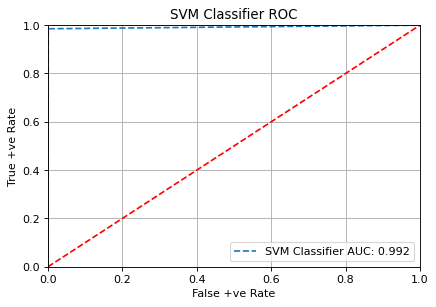

In [250]:
fpr7, tpr7, thresholds7 = m.roc_curve(TestB, SVMPred, pos_label=1)
SVM_Curve = m.auc(fpr7, tpr7)
fig7=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("SVM Classifier Area Under Curve is : {0}".format(SVM_Curve))

pt.title('SVM Classifier ROC')
pt.plot(fpr7, tpr7,linestyle='--', label='SVM Classifier AUC: %0.3f' %SVM_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('SVM ROC')
pt.grid()
pt.show()

# 8.Evaluating the Performance of the Models

## 8.1 Performance by Accuracy

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

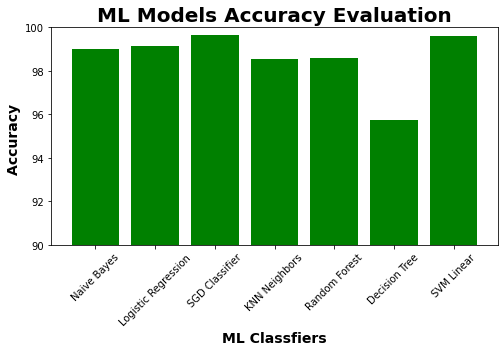

In [252]:
#Displaying the Accuracies of ML Models in bar graph
bar_width = 0.3
pt.figure(figsize=(8,4))

pt.ylim((90,100))
MLClass_acc=["Naive Bayes","Logistic Regression","SGD Classifier", "KNN Neighbors", "Random Forest", "Decision Tree","SVM Linear"]
data_acc=[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7]
pt.bar(x=MLClass_acc,height=data_acc,align='center', color='green')
pt.xlabel('ML Classfiers',fontsize=14,fontweight='bold')
pt.ylabel('Accuracy ',fontsize=14,fontweight='bold')
pt.title(' ML Models Accuracy Evaluation ',fontsize=20,fontweight='bold')
pt.xticks(rotation=45)

## 8.2 Performance by ROC-AUC

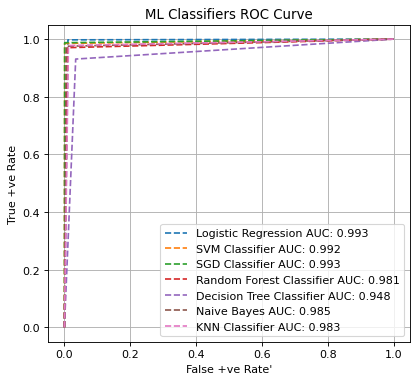

In [253]:
#Comparing all the ML Models in terms of ROC-AUC
figFinal=pt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')
pt.subplot(2,2,1)

pt.plot(fpr2, tpr2,linestyle='--', label='Logistic Regression AUC: %0.3f' %LR_Curve)
pt.plot(fpr7, tpr7,linestyle='--', label='SVM Classifier AUC: %0.3f' %SVM_Curve)
pt.plot(fpr3, tpr3,linestyle='--', label='SGD Classifier AUC: %0.3f' %SGD_Curve)
pt.plot(fpr5, tpr5,linestyle='--', label='Random Forest Classifier AUC: %0.3f' %RDF_Curve)
pt.plot(fpr6, tpr6,linestyle='--', label='Decision Tree Classifier AUC: %0.3f' %DT_Curve)
pt.plot(fpr1, tpr1,linestyle='--', label='Naive Bayes AUC: %0.3f' %NB_Curve)
pt.plot(fpr4, tpr4,linestyle='--', label='KNN Classifier AUC: %0.3f' %KNN_Curve)

pt.title("ML Classifiers ROC Curve")
pt.xlabel("False +ve Rate'")
pt.ylabel("True +ve Rate")
pt.legend(loc='lower right')
pt.grid()
pt.savefig('ALL ROC')
pt.tight_layout()

